In [337]:
import numpy as np, pandas as pd
import matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns

mpl.rc('font', family='Pretendard') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드 음수 부호 설정

# 차트 스타일 설정
sns.set(font='Pretendard', rc={'axes.unicode_minus':False}, style='darkgrid')
plt.rc('figure', figsize=(10, 8))

In [338]:
# 1. 데이터 로드

full_df = pd.read_csv('full_date.csv', index_col=0)

full_df

,hsk03,hsk03_us,hsk_08,dubai,brent,wti,exr
23-04,5906687,2574538,438538,83.44,83.37,79.44,1320.01
23-03,6258915,2701706,484411,78.51,79.21,73.37,1305.73
23-02,5369767,2307074,448633,82.11,83.54,76.86,1270.74
23-01,4797781,2027721,418781,80.42,83.91,78.16,1247.25
22-12,5201391,2279105,430070,77.22,81.34,76.52,1296.22
...,...,...,...,...,...,...,...
16-05,3166111,1342770,341990,44.26,47.65,46.80,1171.51
16-04,3231914,1387117,326991,38.99,43.34,41.12,1147.51
16-03,3683674,1658329,338135,35.24,39.79,37.96,1188.21
16-02,2724255,1265478,277381,28.87,33.53,30.62,1217.35


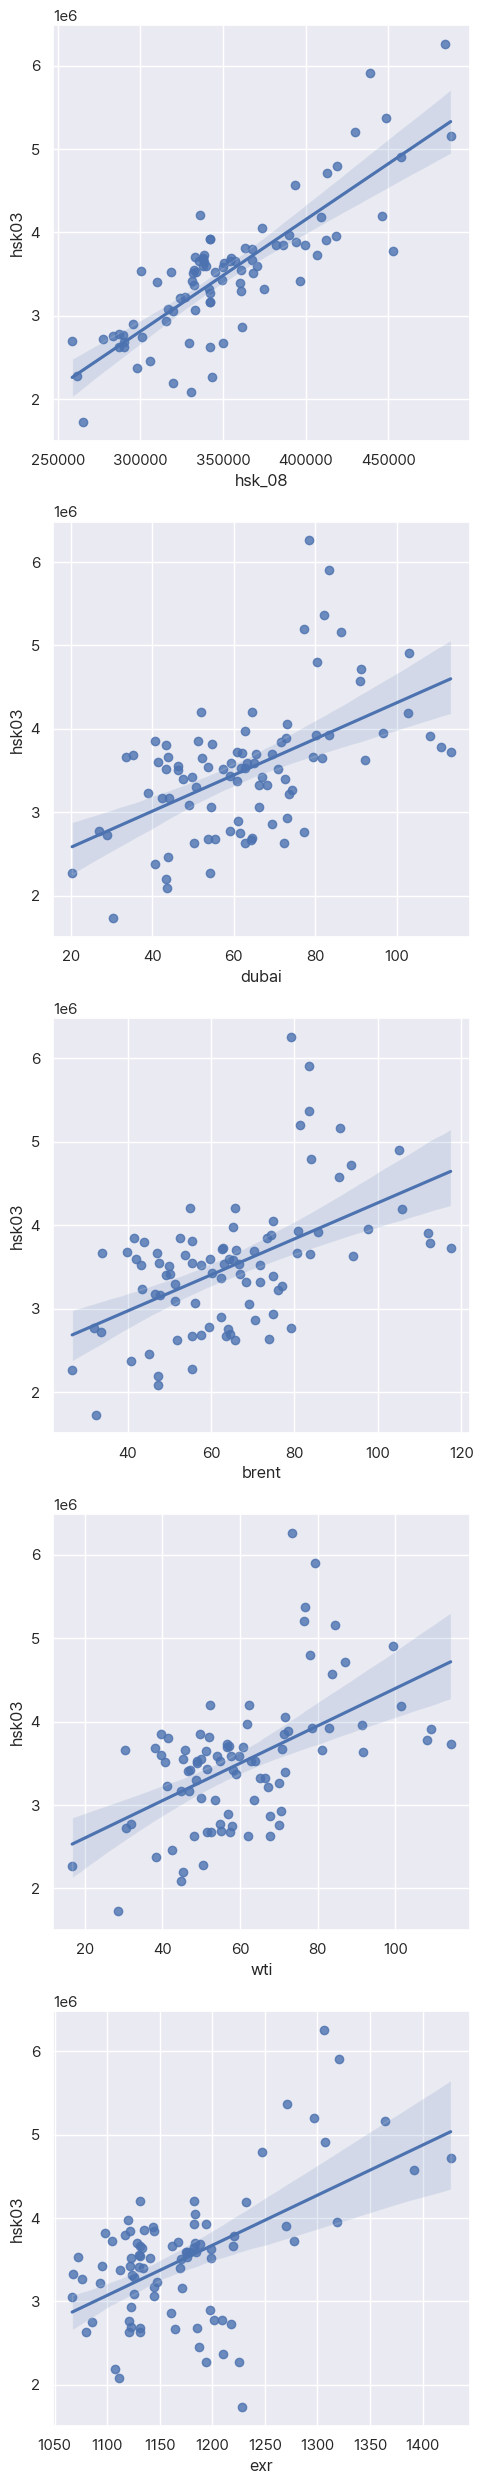

In [339]:
# 2. 산점도 및 회귀식

# 2-1. 자동차 수출 전체
fig, axs = plt.subplots(5, 1, figsize=(5, 25))
ex_features = ['hsk_08', 'dubai', 'brent','wti', 'exr']
for i, feature in enumerate(ex_features):
    sns.regplot(x = feature, y = 'hsk03', data = full_df, ax = axs[i])
plt.tight_layout()


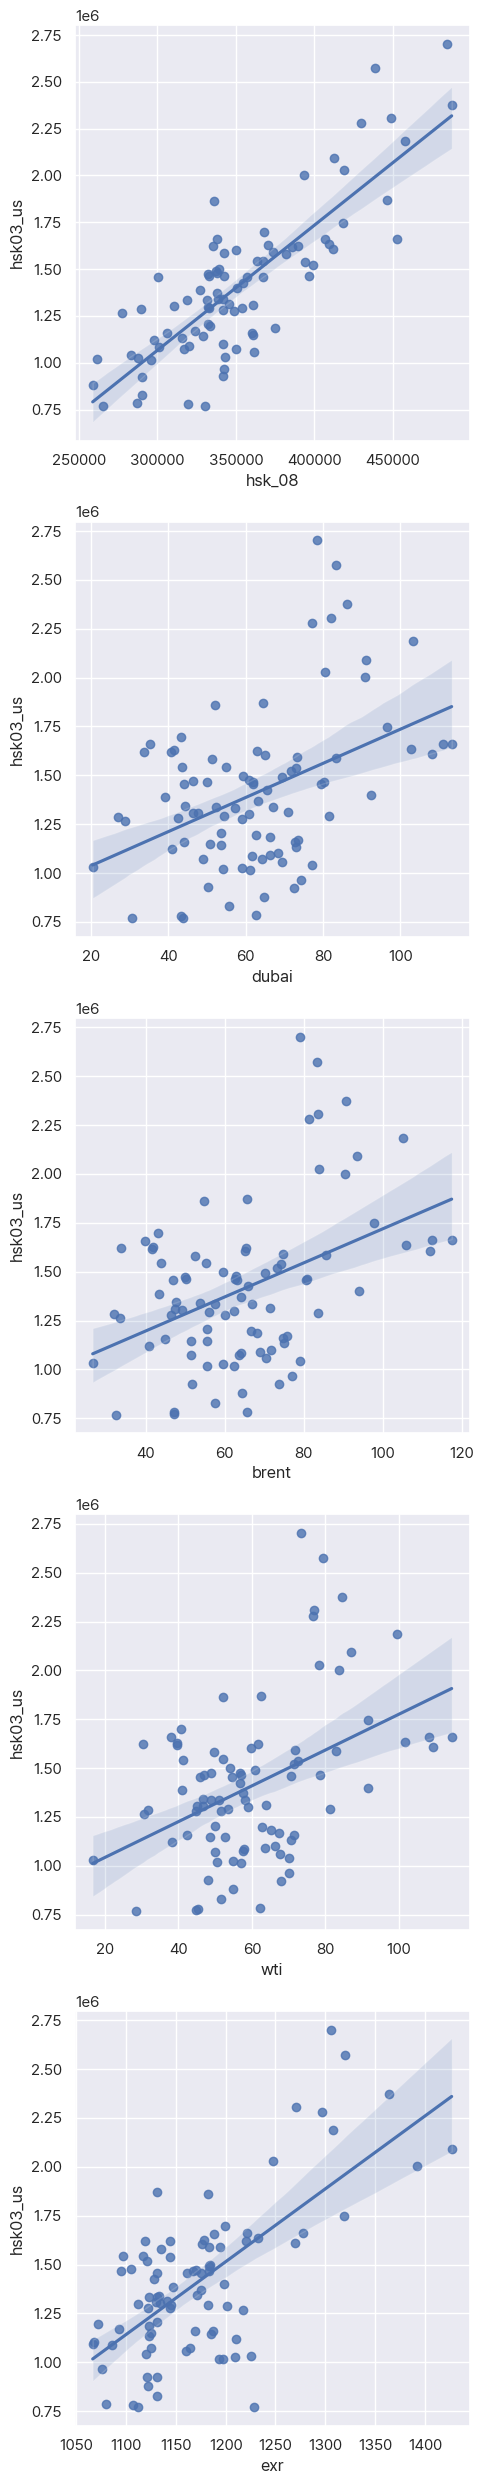

In [340]:
# 2-2. 대미 수출
fig, axs = plt.subplots(5, 1, figsize=(5, 25))
ex_features = ['hsk_08', 'dubai', 'brent','wti', 'exr']
for i, feature in enumerate(ex_features):
    sns.regplot(x = feature, y = 'hsk03_us', data = full_df, ax = axs[i])
plt.tight_layout()

In [341]:
import statsmodels.api as sm

x = full_df.iloc[:, 2:]
x = sm.add_constant(x) # 상수항 추가
y = full_df[['hsk03_us']]
model = sm.OLS(y, x)
results = model.fit()

results.summary() # The condition number is large

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hsk03_us   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     57.86
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           1.84e-25
Time:                        16:44:18   Log-Likelihood:                -1192.3
No. Observations:                  88   AIC:                             2397.
Df Residuals:                      82   BIC:                             2411.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.77e+06   3.48e+05     -7.953      0.000   -3.46e+06   -2.08e+06
hsk_08         5.7644      0.564     10.212      0.000       4.641       6.887
dubai       2.146e+04   1.48e+04      1.451      0.151   -7961.367    5.09e+04
brent      -1.804e+04   1.89e+04     -0.952      0.344   -5.57e+04    1.97e+04
wti        -6211.2317   9352.005     -0.664      0.508   -2.48e+04    1.24e+04
exr         2001.5107    341.608      5.859      0.000    1321.943    2681.078
==============================================================================
Omnibus:                        1.801   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.235
Skew:                          -0.257   Prob(JB):                        0.539
Kurtosis:                       3.269   Cond. No.                     6.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [342]:
# 스케일링
feature_names = ['scale({})'.format(x_name) for x_name in ex_features]

model2 = sm.OLS.from_formula('scale(hsk03_us) ~' + '+'.join(feature_names), data=full_df)
results2 = model2.fit()

results2.summary() # The condition number decreased

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        scale(hsk03_us)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     57.86
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           1.84e-25
Time:                        16:44:19   Log-Likelihood:                -58.416
No. Observations:                  88   AIC:                             128.8
Df Residuals:                      82   BIC:                             143.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.012e-16      0.052   3.88e-15      1.000      -0.103       0.103
scale(hsk_08)     0.7114      0.070     10.212      0.000       0.573       0.850
scale(dubai)      1.0487      0.723      1.451      0.151      -0.389       2.487
scale(brent)     -0.8776      0.922     -0.952      0.344      -2.711       0.956
scale(wti)       -0.2939      0.442     -0.664      0.508      -1.174       0.586
scale(exr)        0.3628      0.062      5.859      0.000       0.240       0.486
==============================================================================
Omnibus:                        1.801   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.235
Skew:                          -0.257   Prob(JB):                        0.539
Kurtosis:                       3.269   Cond. No.                         42.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [343]:
feature_names2 = ['scale({})'.format(x_name) for x_name in ['hsk_08', 'dubai', 'exr']]

model3 = sm.OLS.from_formula('scale(hsk03_us) ~' + '+'.join(feature_names2), data=full_df)
results3 = model3.fit()

results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        scale(hsk03_us)   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     93.35
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           1.16e-26
Time:                        16:44:19   Log-Likelihood:                -60.343
No. Observations:                  88   AIC:                             128.7
Df Residuals:                      84   BIC:                             138.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.012e-16      0.052   3.84e-15      1.000      -0.104       0.104
scale(hsk_08)     0.6966      0.068     10.181      0.000       0.561       0.833
scale(dubai)     -0.1057      0.064     -1.653      0.102      -0.233       0.021
scale(exr)        0.3559      0.062      5.713      0.000       0.232       0.480
==============================================================================
Omnibus:                        2.505   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                1.895
Skew:                          -0.335   Prob(JB):                        0.388
Kurtosis:                       3.262   Cond. No.                         2.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [344]:
feature_names3 = ['scale({})'.format(x_name) for x_name in ['hsk_08', 'exr']]

model4 = sm.OLS.from_formula('scale(hsk03_us) ~' + '+'.join(feature_names3), data=full_df)
results4 = model4.fit()

results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        scale(hsk03_us)   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     135.9
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           3.34e-27
Time:                        16:44:19   Log-Likelihood:                -61.751
No. Observations:                  88   AIC:                             129.5
Df Residuals:                      85   BIC:                             136.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.874e-16      0.053   3.54e-15      1.000      -0.105       0.105
scale(hsk_08)     0.6468      0.062     10.423      0.000       0.523       0.770
scale(exr)        0.3388      0.062      5.459      0.000       0.215       0.462
==============================================================================
Omnibus:                        0.606   Durbin-Watson:                   1.386
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.553
Skew:                          -0.188   Prob(JB):                        0.758
Kurtosis:                       2.905   Cond. No.                         1.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [345]:
model5 = sm.OLS.from_formula('scale(hsk03_us) ~ scale(exr)', data=full_df)
results5 = model5.fit()

results5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        scale(hsk03_us)   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     72.46
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           4.84e-13
Time:                        16:44:19   Log-Likelihood:                -97.977
No. Observations:                  88   AIC:                             200.0
Df Residuals:                      86   BIC:                             204.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.874e-16      0.079   2.36e-15      1.000      -0.158       0.158
scale(exr)     0.6762      0.079      8.512      0.000       0.518       0.834
==============================================================================
Omnibus:                        0.596   Durbin-Watson:                   1.084
Prob(Omnibus):                  0.742   Jarque-Bera (JB):                0.199
Skew:                          -0.049   Prob(JB):                        0.905
Kurtosis:                       3.211   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [346]:
from sklearn.preprocessing import StandardScaler

# 사이킷런으로 표준화
s_full = StandardScaler().fit_transform(full_df.iloc[:, 1:])
s_full_df = pd.DataFrame(s_full, columns=['hsk03_us']+ex_features)

s_full_df

,hsk03_us,hsk_08,dubai,brent,wti,exr
0,2.945095,1.778858,1.058527,0.962465,1.018106,2.057660
1,3.267598,2.721494,0.802721,0.745629,0.692766,1.857860
2,2.266797,1.986299,0.989516,0.971327,0.879823,1.368294
3,1.558348,1.372875,0.901826,0.990612,0.949501,1.039631
4,2.195867,1.604851,0.735785,0.856654,0.861600,1.724800
...,...,...,...,...,...,...
83,-0.178712,-0.205090,-0.974434,-0.899407,-0.731332,-0.020092
84,-0.066246,-0.513302,-1.247882,-1.124062,-1.035769,-0.355891
85,0.621557,-0.284306,-1.442461,-1.309102,-1.205139,0.213567
86,-0.374727,-1.532729,-1.772985,-1.635399,-1.598548,0.621283


In [347]:
sk_x = s_full_df.iloc[:, 1:].drop(columns=['brent', 'wti'])
sk_y = s_full_df[['hsk03_us']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sk_x, sk_y, test_size=0.3,\
                                                    random_state=10)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

lr.score(x_test, y_test), lr.coef_, lr.intercept_

(0.7502638531830907,
 array([[ 0.70969437, -0.12142326,  0.3586543 ]]),
 array([-0.00780666]))

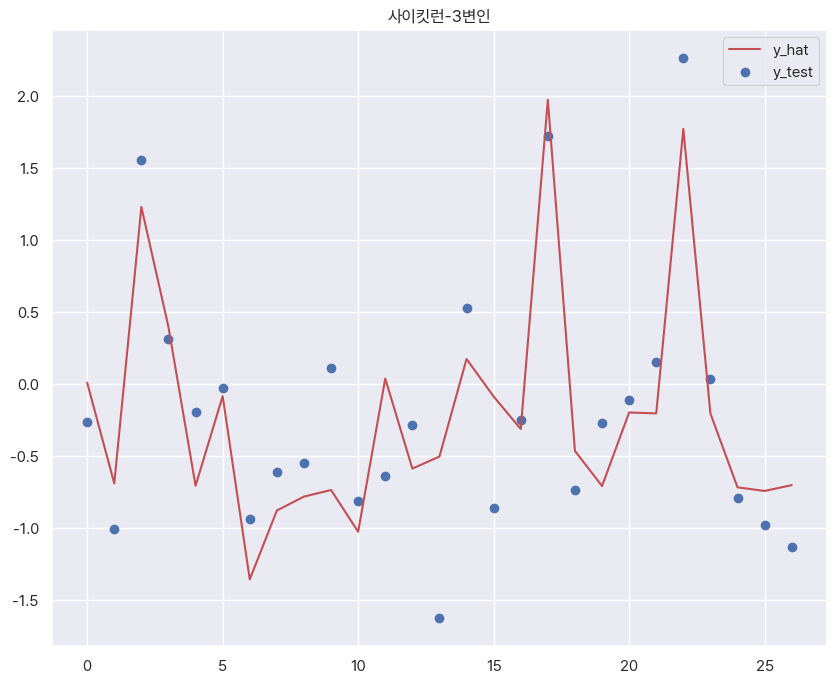

In [348]:
y_hat = lr.predict(x_test)

plt.title('사이킷런-3변인')
plt.plot(y_hat, label='y_hat', c='r')
plt.scatter(range(0, len(x_test)), y_test, label='y_test')

plt.legend()


In [349]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha' : [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] }
gridsearch = GridSearchCV(ridge, param_grid = params)
gridsearch.fit(x_train, y_train)

ridge_estimator = gridsearch.best_estimator_
y_pred = ridge_estimator.predict(x_test)

ridge_estimator.score(x_test, y_test), ridge_estimator.coef_, \
    ridge_estimator.intercept_, gridsearch.best_params_

y_hat_r = ridge_estimator.predict(x_test)

In [351]:
sk_x = s_full_df.iloc[:, 1:].drop(columns=['dubai', 'brent', 'wti'])
sk_y = s_full_df[['hsk03_us']]


x_train, x_test, y_train, y_test = train_test_split(sk_x, sk_y, test_size=0.3,\
                                                    random_state=10)


lr = LinearRegression()
lr.fit(x_train, y_train)

lr.score(x_test, y_test), lr.coef_, lr.intercept_

(0.7512800983185177, array([[0.65177011, 0.32793745]]), array([0.00354869]))

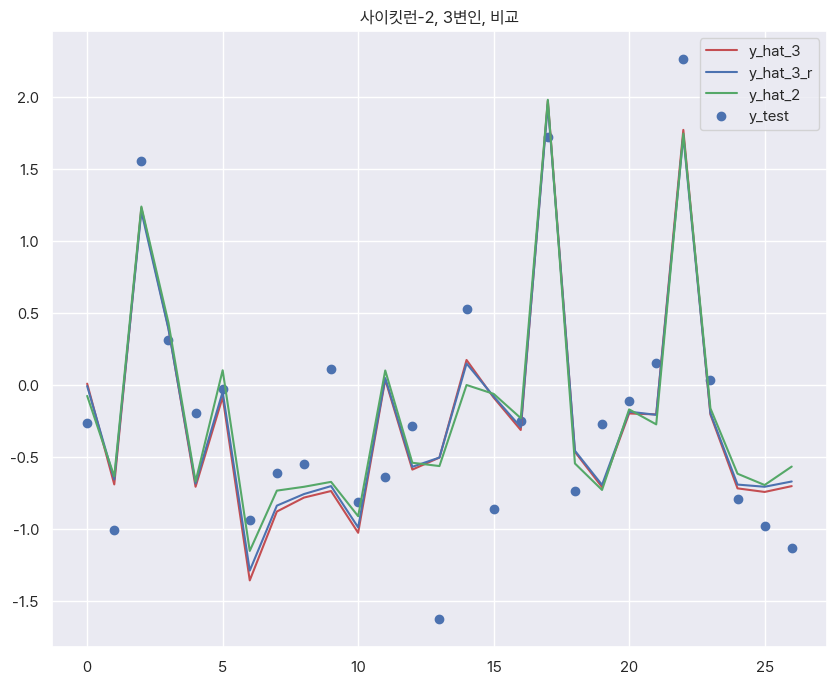

In [352]:
y_hat_ = lr.predict(x_test)

plt.title('사이킷런-2, 3변인, 비교')
plt.plot(y_hat, label='y_hat_3', c='r')
plt.plot(y_hat_r, label='y_hat_3_r')
plt.plot(y_hat_, label='y_hat_2', c='g')
plt.scatter(range(0, len(x_test)), y_test, label='y_test')

plt.legend()

In [361]:
# 미국의 한, 중, 일 3개국으로부터의 연간 Transportation 수입과 연간 평균 원달러환율

c3_df = pd.read_csv('by_c.csv', index_col=0)

c3_features = ['scale({})'.format(x_name) for x_name \
               in list(c3_df.drop(columns=['kor']).columns)]

model_c3 = sm.OLS.from_formula('scale(kor) ~' + '+'.join(c3_features), data=c3_df)
results_c3 = model_c3.fit()

results_c3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             scale(kor)   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     30.27
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           7.88e-07
Time:                        17:57:15   Log-Likelihood:                -9.3948
No. Observations:                  20   AIC:                             26.79
Df Residuals:                      16   BIC:                             30.77
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.816e-16      0.097  -3.94e-15      1.000      -0.205       0.205
scale(jp)         0.0982      0.161      0.608      0.552      -0.244       0.440
scale(cn)         0.8927      0.108      8.292      0.000       0.664       1.121
scale(kd_exr)     0.0657      0.151      0.436      0.668      -0.254       0.385
==============================================================================
Omnibus:                        1.623   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.132
Skew:                          -0.569   Prob(JB):                        0.568
Kurtosis:                       2.752   Cond. No.                         3.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [362]:
model_kc = sm.OLS.from_formula('scale(kor) ~ scale(cn)', data=c3_df)
results_kc = model_kc.fit()
results_kc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             scale(kor)   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     99.43
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           9.33e-09
Time:                        18:01:01   Log-Likelihood:                -9.6241
No. Observations:                  20   AIC:                             23.25
Df Residuals:                      18   BIC:                             25.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.372e-16      0.092  -4.74e-15      1.000      -0.194       0.194
scale(cn)      0.9202      0.092      9.971      0.000       0.726       1.114
==============================================================================
Omnibus:                        2.206   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.332   Jarque-Bera (JB):                1.687
Skew:                          -0.688   Prob(JB):                        0.430
Kurtosis:                       2.637   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""